# 은전한닢(Mecab)이용 형태소 분석

In [1]:
from konlpy.tag import Mecab
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.font_manager as fm
from sklearn.manifold import TSNE
import matplotlib as mpl
import pandas as pd

In [2]:
tagger = Mecab()

In [3]:
bodies_description_txt = open("./whole/bodies_description.txt", "r")
diseases_description_txt = open("./whole/diseases_description.txt", "r")
interventions_description_txt = open("./whole/interventions_description.txt", "r")

bodies = bodies_description_txt.read()
diseases = diseases_description_txt.read()
interventions = interventions_description_txt.read()

In [4]:
# 라인 피드를 기준으로 문장단위로 분절

bodies_processed=[]
for sent in bodies.split("\n"):
    sent_morph = tagger.morphs(sent)
    bodies_processed.append(sent_morph)

diseases_processed=[]
for sent in diseases.split("\n"):
    sent_morph = tagger.morphs(sent)
    diseases_processed.append(sent_morph)
    
interventions_processed=[]
for sent in interventions.split("\n"):
    sent_morph = tagger.morphs(sent)
    interventions_processed.append(sent_morph)

In [5]:
bodies_w2v = Word2Vec(bodies_processed, size=300, window=20, min_count=2)
diseases_w2v = Word2Vec(diseases_processed, size=300, window=20, min_count=2)
interventions_w2v = Word2Vec(interventions_processed, size=300, window=20, min_count=2)

In [36]:
bodies_w2v.wv.most_similar(positive=["척수"], topn=10)

[('뒷부분', 0.9971093535423279),
 ('사이', 0.994823694229126),
 ('머리뼈', 0.9940828084945679),
 ('위치', 0.9940342903137207),
 ('다발', 0.9934269189834595),
 ('흉곽', 0.9931000471115112),
 ('안쪽', 0.9924386143684387),
 ('진피', 0.9923142194747925),
 ('뇌', 0.9921132922172546),
 ('형성', 0.9915109872817993)]

In [37]:
diseases_w2v.wv.most_similar(positive=["대상포진"], topn=10)

[('신경통', 0.8542293310165405),
 ('목감기', 0.8171212673187256),
 ('오랜', 0.7798596620559692),
 ('두드러기', 0.7667258977890015),
 ('쉬워', 0.7578330636024475),
 ('유선염', 0.7556999921798706),
 ('여행자', 0.7514933347702026),
 ('치주염', 0.748778223991394),
 ('편도선염', 0.7476192116737366),
 ('독감', 0.7449496984481812)]

In [38]:
interventions_w2v.wv.most_similar(positive=["초음파"], topn=10)

[('영상', 0.9422159194946289),
 ('구불', 0.9260534644126892),
 ('조영', 0.9116613864898682),
 ('이용', 0.9085636138916016),
 ('생검', 0.9084272980690002),
 ('사진', 0.90167635679245),
 ('수소', 0.9015828967094421),
 ('X', 0.9005736112594604),
 ('선', 0.8992973566055298),
 ('식도', 0.8957855701446533)]

# ETRI JSON Analysis

In [13]:
import os
import json
import numpy as np
from collections import Counter
from collections import defaultdict

In [7]:
file_names = os.listdir("./output/ETRI/NER")
jsons = defaultdict()
for file in file_names:
    temp = open("./output/ETRI/NER/" + file, "r").read()
    jsons[file] = json.loads(temp)
    

In [9]:
ner = []
for k in jsons.keys():
    sentLen = len(jsons[k]["return_object"]["sentence"])
    sentence = jsons[k]["return_object"]["sentence"]
    for sent in sentence:
        for i in range(sentLen):
            neLen = len(jsons[k]["return_object"]["sentence"][i]["NE"])
            for j in range(neLen):
                type_ = jsons[k]["return_object"]["sentence"][i]["NE"][j]["type"]
                text = jsons[k]["return_object"]["sentence"][i]["NE"][j]["text"]
                ner.append((type_ , text))
                
c_ner = Counter(ner)

# WordCloud

In [26]:
from wordcloud import WordCloud

In [39]:
def flat(l):
    flat_list = []
    for sublist in l:
        for item in sublist:
            flat_list.append(item)
    return flat_list

In [41]:
d_bodies = dict(Counter(flat(bodies_processed)))
d_diseases = dict(Counter(flat(diseases_processed)))
d_interventions = dict(Counter(flat(interventions_processed)))

# Visualization

## 한계

기존 visualization code는 가장 빈도가 많은 토큰만 중심으로 보여주기에 중요한 신체명이나 질환명, 검사명 기준으로 가까운 토큰을 찾기 못함



bodies_w2v
diseases_w2v
interventions_w2v

In [6]:
def tsne_plot(model):
    path_nanum = "NanumMyeongjo-Bold.ttf"
    prop = fm.FontProperties(fname=path_nanum)
    
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                     fontproperties=prop)
    plt.show()

/home/seongtae/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


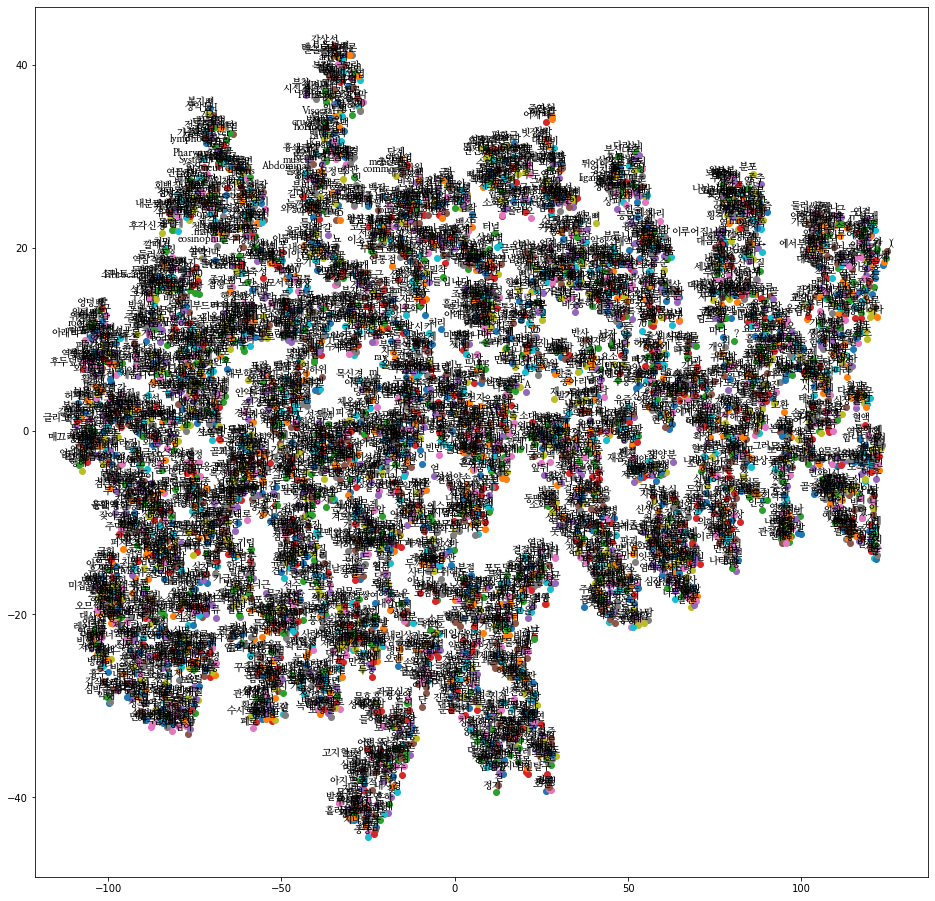

In [7]:
tsne_plot(bodies_w2v)

/home/seongtae/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/home/seongtae/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/seongtae/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 36335 missing from current font.
  font.set_text(s, 0, flags=flags)


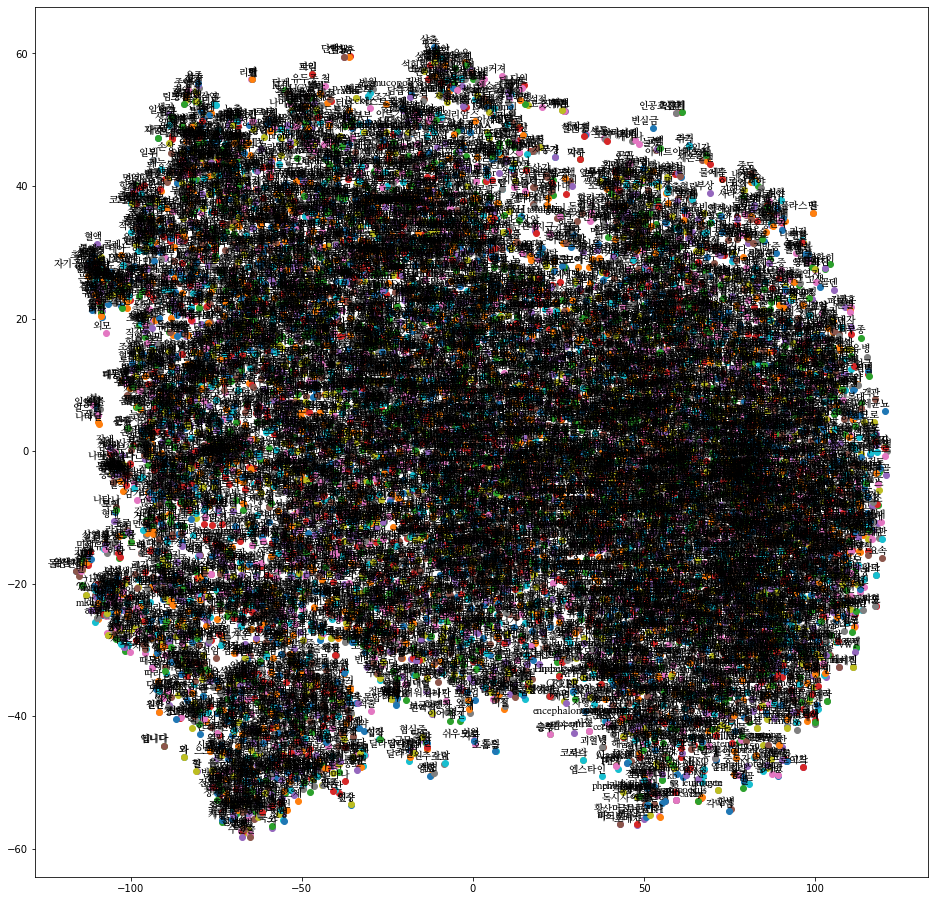

In [8]:
tsne_plot(diseases_w2v)

/home/seongtae/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


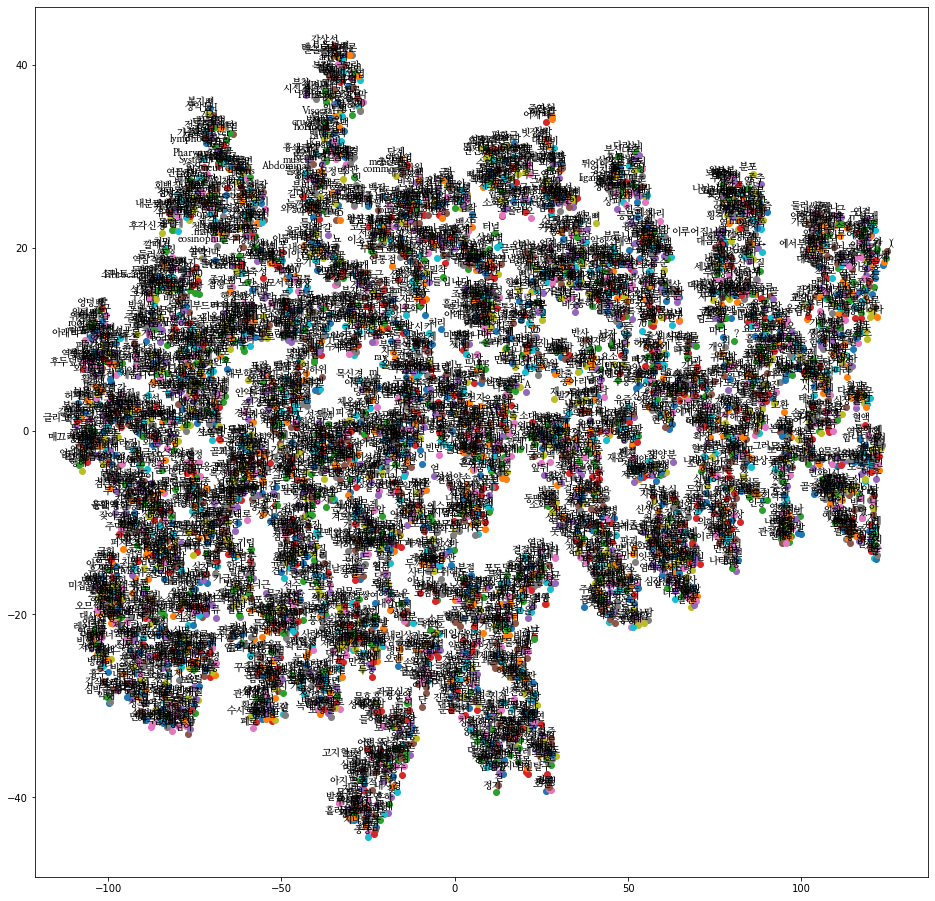

In [9]:
tsne_plot(bodies_w2v)

# FastText